# **Map visualization**

1. Creating Busan Map

In [7]:
import folium

busan =[35.1797957, 129.0727983]
m = folium.Map(location = busan, \
                zoom_start = 12, width=800,height=500)
m


In [8]:
from branca.element import Figure
fig = Figure(width=600, height=400)
busan =[35.1797957, 129.0727983]
m = folium.Map(location = busan, zoom_start = 12 )
fig.add_child(m)

Layer

In [9]:
fig2 = Figure(width=600, height=400)
m2 = folium.Map(location = busan, zoom_start = 12)
folium.TileLayer('Stamen Terrain').add_to(m2)
folium.TileLayer('Stamen Toner').add_to(m2)
folium.TileLayer('Stamen Water Color').add_to(m2)
folium.TileLayer('cartodbpositron').add_to(m2)
folium.TileLayer('cartodbdark_matter').add_to(m2)
folium.LayerControl().add_to(m2)
fig2.add_child(m2)

ValueError: Custom tiles must have an attribution.

Marker

In [ ]:
fig3 = Figure(width=600, height=400)
# Infos
pnu = [35.23379098528912, 129.08090997889803]
pnu_station=[35.22884833731382, 129.09063225747852]
# map
m3 = folium.Map( pnu, zoom_start=15, tiles='Stamen Toner')

# Marker for PNU
folium.Marker(pnu, popup='PNU', \
             tooltip='Click here to see Popup', \
             icon=folium.Icon(icon='bookmark', color='red', prefix='fa')).add_to(m3)

# Makrer for PNU subway
folium.Marker(pnu_station, popup='PNU Subwary', \
             icon=folium.Icon(icon='subway', color='blue', prefix='fa')).add_to(m3)

fig3.add_child(m3)


NameError: name 'Figure' is not defined

Maker cluster

In [ ]:
import pandas as pd
import folium
from folium import Marker
from folium.plugins import MarkerCluster

In [ ]:
# upload actor.csv file
from google.colab import files
file_uploaded = files.upload()

Saving subway.csv to subway.csv


In [ ]:
df = pd.read_csv('subway.csv')
df.head()

,Unnamed: 0,역사명,노선명,역위도,역경도,위경도
0,0,다대포해수욕장,부산도시철도 1호선,35.048670,128.964100,"[35.04867, 128.9641]"
1,1,다대포항역,부산도시철도 1호선,35.057820,128.971300,"[35.05782, 128.9713]"
2,2,낫개역,부산도시철도 1호선,35.065265,128.979873,"[35.065265, 128.979873]"
3,3,신장림역,부산도시철도 1호선,35.074433,128.977041,"[35.074433, 128.977041]"
4,4,장림역,부산도시철도 1호선,35.081090,128.977500,"[35.08109, 128.9775]"


In [ ]:
fig_marker = Figure(width=1024, height=768)
fig_cluster = Figure(width=1024, height=768)
map_marker = folium.Map(location=[35.1795543, 129.0756416], tiles="OpenStreetMap", zoom_start=11)
map_cluster = folium.Map(location=[35.1795543, 129.0756416], tiles="OpenStreetMap", zoom_start=11)

In [ ]:
for _, i in df.iterrows():
    Marker(location = [i['역위도'], i['역경도']],
           popup = "<pre>" + "노선명: " + str(i['노선명']) + "<br>" + "역사명: " + str(i['역사명']) + "<br>" + "</pre>",
           icon = folium.Icon(color = 'blue')
           ).add_to(map_marker)

fig_marker.add_child(map_marker)

In [ ]:
cluster = MarkerCluster()
for _, i in df.iterrows():
    cluster.add_child(
        Marker(location = [i['역위도'], i['역경도']],
               popup = "<pre>" + "노선명: " + str(i['노선명']) + "<br>" + "역사명: " + str(i['역사명']) + "<br>" + "</pre>",)
    ).add_to(map_cluster)

fig_cluster.add_child(map_cluster)


Add Geojson to draw a boundary


In [ ]:
import pandas as pd
import folium
from folium import Marker
from folium.plugins import MarkerCluster
import json


In [ ]:
from google.colab import files
file_uploaded = files.upload()

Saving busan_gu.json to busan_gu.json


In [ ]:
busan_geojson = json.load(open('busan_gu.json', encoding='utf-8'))
busan_geojson["features"][0]

{'type': 'Feature',
 'id': '중구',
 'properties': {'code': '21010',
  'name': '중구',
  'name_eng': 'Jung-gu',
  'base_year': '2013'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[129.032, 35.116],
    [129.038, 35.112],
    [129.042, 35.111],
    [129.041, 35.108],
    [129.038, 35.104],
    [129.038, 35.098],
    [129.037, 35.097],
    [129.029, 35.096],
    [129.026, 35.096],
    [129.024, 35.1],
    [129.022, 35.102],
    [129.021, 35.106],
    [129.023, 35.109],
    [129.024, 35.109],
    [129.026, 35.111],
    [129.028, 35.11],
    [129.028, 35.115],
    [129.032, 35.116]]]}}

In [ ]:
fig3 = Figure(width=600, height=400)
busan =[35.1797957, 129.0727983]
m = folium.Map(location=busan, zoom_start=10, titles="Busan Gu Boundaries")
folium.GeoJson(busan_geojson).add_to(m)

fig3.add_child(m)

In [ ]:
from google.colab import files
file_uploaded = files.upload()

Saving busan.csv to busan.csv


In [ ]:
busan_df = pd.read_csv("./busan.csv", encoding="cp949", index_col=0)
busan_df

,price,population,area,density
gu,,,,
중구,15515,44852,2.83,15849
서구,28665,112621,13.98,8056
동구,20729,89144,9.74,9152
영도구,17024,121934,14.20,8587
부산진구,28781,365337,29.67,12313
동래구,35607,267735,16.63,16100
남구,29597,286093,26.81,10671
북구,23090,299547,39.37,7609
해운대구,34649,414611,51.47,8055


In [ ]:
fig = Figure(width=800, height=600)
busan =[35.1797957, 129.0727983]
busan_map = folium.Map(location=busan, zoom_start=10)
folium.Choropleth(geo_data=busan_geojson,
               data=busan_df["price"],
               columns =[df.index, df["price"]],
               fill_color="PuRd",
               key_on="feature.id").add_to(busan_map)
fig.add_child(busan_map)

# Bike Sharing in the Bay Area

In [ ]:
import pandas as pd
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
#import plotly.express as px
#import plotly.graph_objects as go
plt.style.use('fivethirtyeight')
import numpy as np

In [ ]:
url = "https://raw.githubusercontent.com/data-8/textbook/main/assets/data/trip.csv"
trip = pd.read_csv(url)
trip

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
3,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
...,...,...,...,...,...,...,...,...,...,...,...
354147,432951,619,9/1/2014 4:21,Powell Street BART,39,9/1/2014 4:32,Townsend at 7th,65,335,Subscriber,94118
354148,432950,6712,9/1/2014 3:16,Harry Bridges Plaza (Ferry Building),50,9/1/2014 5:08,San Francisco Caltrain (Townsend at 4th),70,259,Customer,44100
354149,432949,538,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:14,5th at Howard,57,466,Customer,32
354150,432948,568,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:15,5th at Howard,57,461,Customer,32


In [ ]:
import seaborn as sns

# focus commute less than 1800 sec (30 mins.). Free trip
commute = trip[trip.Duration < 1800]
TotalDuration = commute['Duration'].sum()
commute['PercDur']= commute['Duration']/TotalDuration
commute

<ipython-input-34-8c010ea48a1a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commute['PercDur']= commute['Duration']/TotalDuration


,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code,PercDur
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139,0.000004
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032,0.000006
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107,0.000002
3,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113,0.000002
4,913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069,0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...
354146,432952,240,9/1/2014 4:59,South Van Ness at Market,66,9/1/2014 5:03,Civic Center BART (7th at Market),72,292,Subscriber,94102,0.000001
354147,432951,619,9/1/2014 4:21,Powell Street BART,39,9/1/2014 4:32,Townsend at 7th,65,335,Subscriber,94118,0.000003
354149,432949,538,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:14,5th at Howard,57,466,Customer,32,0.000003
354150,432948,568,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:15,5th at Howard,57,461,Customer,32,0.000003


In [ ]:
commute = trip[trip.Duration < 1800]
commute

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
3,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
...,...,...,...,...,...,...,...,...,...,...,...
354146,432952,240,9/1/2014 4:59,South Van Ness at Market,66,9/1/2014 5:03,Civic Center BART (7th at Market),72,292,Subscriber,94102
354147,432951,619,9/1/2014 4:21,Powell Street BART,39,9/1/2014 4:32,Townsend at 7th,65,335,Subscriber,94118
354149,432949,538,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:14,5th at Howard,57,466,Customer,32
354150,432948,568,9/1/2014 0:05,South Van Ness at Market,66,9/1/2014 0:15,5th at Howard,57,461,Customer,32


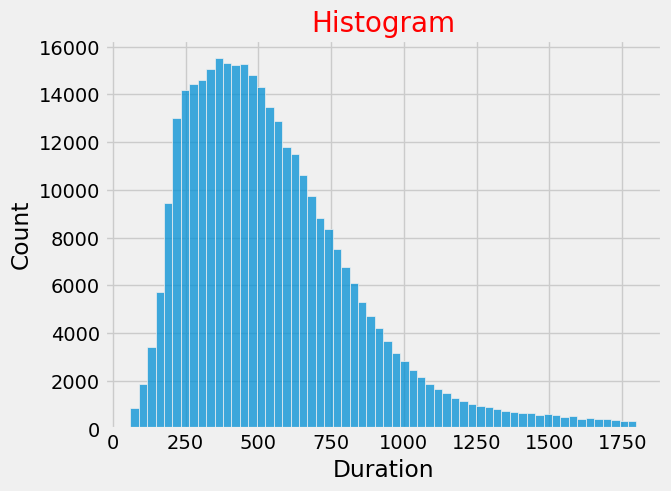

In [ ]:
commute = trip[trip.Duration < 1800]
fig, ax = plt.subplots()
ax=sns.histplot(data=commute, x = "Duration", bins=60)
ax.set_xlabel("Duration")
ax.set_ylabel("Count")
ax.set_title("Histogram", size=20, color="red")
plt.show()

## Exploring the Data with `group` and `pivot`

In [ ]:
starts = commute.groupby('Start Station')['Start Station'].count()
starts

Start Station
2nd at Folsom                                     7841
2nd at South Park                                 9274
2nd at Townsend                                  13674
5th at Howard                                     7394
Adobe on Almaden                                   522
                                                 ...  
Temporary Transbay Terminal (Howard at Beale)    14298
Townsend at 7th                                  13579
University and Emerson                             248
Washington at Kearny                              2395
Yerba Buena Center of the Arts (3rd @ Howard)     5249
Name: Start Station, Length: 70, dtype: int64

In [ ]:
starts = commute.groupby('Start Station')['Start Station'].count().reset_index(name='count').sort_values(by='count', ascending=False)
starts

,Start Station,count
49,San Francisco Caltrain (Townsend at 4th),25858
50,San Francisco Caltrain 2 (330 Townsend),21523
23,Harry Bridges Plaza (Ferry Building),15543
65,Temporary Transbay Terminal (Howard at Beale),14298
2,2nd at Townsend,13674
...,...,...
31,Mezes Park,189
41,Redwood City Medical Center,139
55,San Mateo County Center,108
42,Redwood City Public Library,101


In [ ]:
commute.groupby(['Start Station', 'End Station'])['End Station'].count()

Start Station                                  End Station                                  
2nd at Folsom                                  2nd at Folsom                                     54
                                               2nd at South Park                                295
                                               2nd at Townsend                                  437
                                               5th at Howard                                    113
                                               Beale at Market                                  127
                                                                                               ... 
Yerba Buena Center of the Arts (3rd @ Howard)  Steuart at Market                                202
                                               Temporary Transbay Terminal (Howard at Beale)    113
                                               Townsend at 7th                                  261
       

In [ ]:
commute.groupby(['Start Station', 'End Station'])['End Station'].count().reset_index(name='count')

,Start Station,End Station,count
0,2nd at Folsom,2nd at Folsom,54
1,2nd at Folsom,2nd at South Park,295
2,2nd at Folsom,2nd at Townsend,437
3,2nd at Folsom,5th at Howard,113
4,2nd at Folsom,Beale at Market,127
...,...,...,...
1624,Yerba Buena Center of the Arts (3rd @ Howard),Steuart at Market,202
1625,Yerba Buena Center of the Arts (3rd @ Howard),Temporary Transbay Terminal (Howard at Beale),113
1626,Yerba Buena Center of the Arts (3rd @ Howard),Townsend at 7th,261
1627,Yerba Buena Center of the Arts (3rd @ Howard),Washington at Kearny,66


In [ ]:
pd.pivot_table(commute,
               columns='Start Station',
               index='End Station',
               aggfunc='count').fillna(0).apply(np.int64)

Bike #                    \
Start Station                                 2nd at Folsom 2nd at South Park   
End Station                                                                     
2nd at Folsom                                            54               190   
2nd at South Park                                       295               164   
2nd at Townsend                                         437               151   
5th at Howard                                           113               177   
Adobe on Almaden                                          0                 0   
...                                                     ...               ...   
Temporary Transbay Terminal (Howard at Beale)           414               437   
Townsend at 7th                                         347               309   
University and Emerson                                    0                 0   
Washington at Kearny                                    142               142   
Yerba Buena Center of the Arts (3rd @ Howard)            83               180   

                                                                             \
Start Station                                 2nd at Townsend 5th at Howard   
End Station                                                                   
2nd at Folsom                                             554           107   
2nd at South Park                                          71           180   
2nd at Townsend                                           185            92   
5th at Howard                                             148            83   
Adobe on Almaden                                            0             0   
...                                                       ...           ...   
Temporary Transbay Terminal (Howard at Beale)             486           561   
Townsend at 7th                                           418           313   
University and Emerson                                      0             0   
Washington at Kearny                                       72            47   
Yerba Buena Center of the Arts (3rd @ Howard)             174            90   

                                                                \
Start Station                                 Adobe on Almaden   
End Station                                                      
2nd at Folsom                                                0   
2nd at South Park                                            0   
2nd at Townsend                                              0   
5th at Howard                                                0   
Adobe on Almaden                                            11   
...                                                        ...   
Temporary Transbay Terminal (Howard at Beale)                0   
Townsend at 7th                                              0   
University and Emerson                                       0   
Washington at Kearny                                         0   
Yerba Buena Center of the Arts (3rd @ Howard)                0   

                                                                        \
Start Station                                 Arena Green / SAP Center   
End Station                                                              
2nd at Folsom                                                        0   
2nd at South Park                                                    0   
2nd at Townsend                                                      0   
5th at Howard                                                        0   
Adobe on Almaden                                                     4   
...                                                                ...   
Temporary Transbay Terminal (Howard at Beale)                        0   
Townsend at 7th                                                      0   
University and Emerson                                               0  

In [ ]:
pd.pivot_table(commute,
               columns='Start Station',
               index='End Station',
               values='Duration',
               aggfunc='min').fillna(0).apply(np.int64)

Start Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,...,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
End Station,,,,,,,,,,,,,,,,,,,,,
2nd at Folsom,61,97,164,268,0,0,271,407,0,0,...,590,208,0,0,318,149,448,0,429,165
2nd at South Park,61,60,77,86,0,0,78,345,0,0,...,399,63,0,0,79,61,78,0,270,96
2nd at Townsend,137,67,60,423,0,0,311,469,0,0,...,777,241,0,0,291,249,259,0,610,284
5th at Howard,215,300,384,68,0,0,357,530,0,0,...,375,402,0,0,455,265,357,0,553,109
Adobe on Almaden,0,0,0,0,84,275,0,0,0,0,...,0,0,369,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Temporary Transbay Terminal (Howard at Beale),112,195,261,279,0,0,68,261,0,0,...,647,137,0,0,139,60,542,0,311,226
Townsend at 7th,399,324,319,330,0,0,614,822,0,0,...,351,514,0,0,624,534,61,0,817,432
University and Emerson,0,0,0,0,0,0,0,0,592,0,...,0,0,0,0,0,0,0,93,0,0


## Drawing Maps

In [ ]:
url = "https://raw.githubusercontent.com/data-8/textbook/main/assets/data/station.csv"
stations = pd.read_csv(url)
stations

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013
...,...,...,...,...,...,...,...
65,77,Market at Sansome,37.789625,-122.400811,27,San Francisco,8/25/2013
66,80,Santa Clara County Civic Center,37.352601,-121.905733,15,San Jose,12/31/2013
67,82,Broadway St at Battery St,37.798541,-122.400862,15,San Francisco,1/22/2014
68,83,Mezes Park,37.491269,-122.236234,15,Redwood City,2/20/2014


In [ ]:
import folium

fig = Figure(width=800, height=600)
cityMap = folium.Map(location = [stations['lat'].mean(axis='rows'), stations['long'].mean(axis='rows')],
              zoom_start = 10)
makerPositions = stations[['lat', 'long']].values.tolist()
for markerPosition in makerPositions:
    folium.Marker(markerPosition).add_to(cityMap)
fig.add_child(cityMap)


In [ ]:
fig = Figure(width=600, height=400)
sf = stations[stations['landmark'] == 'San Francisco']
sf_map_data = folium.Map(location = [sf['lat'].mean(axis='rows'), sf['long'].mean(axis='rows')],
              zoom_start = 12)
makerPositions = stations[['lat', 'long']].values.tolist()
for markerPosition in makerPositions:
    folium.CircleMarker(markerPosition,
                       fill = True,
                       color = 'green').add_to(sf_map_data)
fig.add_child(sf_map_data)

## More Informative Maps: An Application of `join`

In [ ]:
cities = stations.groupby('landmark')['landmark'].count()
cities

landmark
Mountain View     7
Palo Alto         5
Redwood City      7
San Francisco    35
San Jose         16
Name: landmark, dtype: int64

In [ ]:
cities = stations.groupby('landmark')['landmark'].count().reset_index(name='count').rename(columns={'landmark': 'city'})
cities

,city,count
0,Mountain View,7
1,Palo Alto,5
2,Redwood City,7
3,San Francisco,35
4,San Jose,16


In [ ]:
colors = cities.copy()
colors['color'] = np.array(['blue', 'red', 'green', 'orange', 'purple'])
colors

,city,count,color
0,Mountain View,7,blue
1,Palo Alto,5,red
2,Redwood City,7,green
3,San Francisco,35,orange
4,San Jose,16,purple


In [ ]:
# JOIN table stations and colors
joined = stations.join(colors.set_index('city'),
                       on='landmark',
                       how='inner')
colored = joined.loc[:, ['lat', 'long', 'name', 'color']]
colored

,lat,long,name,color
0,37.329732,-121.901782,San Jose Diridon Caltrain Station,purple
1,37.330698,-121.888979,San Jose Civic Center,purple
2,37.333988,-121.894902,Santa Clara at Almaden,purple
3,37.331415,-121.893200,Adobe on Almaden,purple
4,37.336721,-121.894074,San Pedro Square,purple
...,...,...,...,...
62,37.794139,-122.394434,Steuart at Market,orange
63,37.791300,-122.399051,Mechanics Plaza (Market at Battery),orange
64,37.786305,-122.404966,Market at 4th,orange
65,37.789625,-122.400811,Market at Sansome,orange


In [ ]:
fig = Figure(width=800, height=600)

colored_map = folium.Map(location = [colored['lat'].mean(axis='rows'), colored['long'].mean(axis='rows')],
              zoom_start = 10)

for markerData in colored.values:
    folium.Marker([markerData[0],markerData[1]] ,
      icon=folium.Icon(color=markerData[3],icon_color='blue'),
      popup=markerData[2]
      ).add_to(colored_map)
fig.add_child(colored_map)

In [ ]:
starts = commute.groupby('Start Station')['Start Station'].count()
starts

Start Station
2nd at Folsom                                     7841
2nd at South Park                                 9274
2nd at Townsend                                  13674
5th at Howard                                     7394
Adobe on Almaden                                   522
                                                 ...  
Temporary Transbay Terminal (Howard at Beale)    14298
Townsend at 7th                                  13579
University and Emerson                             248
Washington at Kearny                              2395
Yerba Buena Center of the Arts (3rd @ Howard)     5249
Name: Start Station, Length: 70, dtype: int64

In [ ]:
starts = commute.groupby('Start Station')['Start Station'].count().reset_index(name='count').sort_values(by='count', ascending=False)
starts

,Start Station,count
49,San Francisco Caltrain (Townsend at 4th),25858
50,San Francisco Caltrain 2 (330 Townsend),21523
23,Harry Bridges Plaza (Ferry Building),15543
65,Temporary Transbay Terminal (Howard at Beale),14298
2,2nd at Townsend,13674
...,...,...
31,Mezes Park,189
41,Redwood City Medical Center,139
55,San Mateo County Center,108
42,Redwood City Public Library,101


In [ ]:
station_starts = stations.join(starts.set_index('Start Station'),
                               on='name',
                               how='inner')
station_starts

,station_id,name,lat,long,dockcount,landmark,installation,count
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013,4899
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013,574
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013,1888
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013,522
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013,1321
...,...,...,...,...,...,...,...,...
65,77,Market at Sansome,37.789625,-122.400811,27,San Francisco,8/25/2013,11023
66,80,Santa Clara County Civic Center,37.352601,-121.905733,15,San Jose,12/31/2013,510
67,82,Broadway St at Battery St,37.798541,-122.400862,15,San Francisco,1/22/2014,7460
68,83,Mezes Park,37.491269,-122.236234,15,Redwood City,2/20/2014,189


In [ ]:
# Extract columns 'lat', 'long', 'name' from station_starts to starts_map_data
starts_map_data = station_starts.loc[:, ['lat', 'long', 'name']].copy()

# Set color
starts_map_data['colors'] = ['blue'] * 68 # 68 rows

# Set size
starts_map_data['areas'] = station_starts['count'] * 0.3

starts_map_data

,lat,long,name,colors,areas
0,37.329732,-121.901782,San Jose Diridon Caltrain Station,blue,1469.7
1,37.330698,-121.888979,San Jose Civic Center,blue,172.2
2,37.333988,-121.894902,Santa Clara at Almaden,blue,566.4
3,37.331415,-121.893200,Adobe on Almaden,blue,156.6
4,37.336721,-121.894074,San Pedro Square,blue,396.3
...,...,...,...,...,...
65,37.789625,-122.400811,Market at Sansome,blue,3306.9
66,37.352601,-121.905733,Santa Clara County Civic Center,blue,153.0
67,37.798541,-122.400862,Broadway St at Battery St,blue,2238.0
68,37.491269,-122.236234,Mezes Park,blue,56.7


In [ ]:
def color_select(areas):
    if areas > 3000:
        return 'red'
    elif areas > 2000:
        return  'yellow'
    elif areas > 1000:
        return 'green'
    else:
        return 'dodgerblue'

In [ ]:
fig = Figure(width=800, height=600)

stataion_starts_map = folium.Map(location = [starts_map_data['lat'].mean(axis='rows'), starts_map_data['long'].mean(axis='rows')],
              zoom_start = 10)

for markerData in starts_map_data.values:
    folium.CircleMarker([markerData[0],markerData[1]],
                       fill = True,
                       color = color_select(markerData[4]),
                       radius = (markerData[4]**(1/2))/2).add_to(stataion_starts_map)

fig.add_child(stataion_starts_map)